In [13]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/781_Project")
os.listdir()

['gtzan_mfcc.json']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['gtzan_mfcc.json']

In [14]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization

with open("gtzan_mfcc.json", "r") as file:
    data = json.load(file) #Load MFCC dataset from JSON file

X = np.array(data["mfcc"]) #Load MFCCs 
y = np.array(data["labels"]) #Load corresponding genre names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) #Splitting data into random training and test sets

In [15]:
X_train = X_train[..., np.newaxis] #Increase dimension of array by one
X_test = X_test[..., np.newaxis] #Increase dimension of array by one

In [16]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.05, patience=7) #Reduce learning rate when a metric has stopped improving

model = Sequential() #Initializing a sequential model

model.add(Flatten(input_shape=(X_train.shape[1],X_train.shape[2],1))) #Flattens the input vector

model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 

model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs

model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs

model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs

model.add(Dropout(0.1)) #Add dropout to inputs to avoid overfitting 
model.add(Dense(10, activation = "softmax")) #Add a densely connected output layer to the neural network

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Configures the model for training


In [18]:
model.summary() #Prints a string summary of the network


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

In [19]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=75,
                    callbacks=[rlrop],
                    verbose=2) #Trains the model for a fixed number of epochs

Epoch 1/75
282/282 - 7s - loss: 1.9295 - accuracy: 0.3267 - val_loss: 2.0943 - val_accuracy: 0.3740 - lr: 0.0010 - 7s/epoch - 25ms/step
Epoch 2/75
282/282 - 5s - loss: 1.5813 - accuracy: 0.4316 - val_loss: 1.4225 - val_accuracy: 0.4880 - lr: 0.0010 - 5s/epoch - 19ms/step
Epoch 3/75
282/282 - 5s - loss: 1.4708 - accuracy: 0.4729 - val_loss: 1.8146 - val_accuracy: 0.3940 - lr: 0.0010 - 5s/epoch - 17ms/step
Epoch 4/75
282/282 - 5s - loss: 1.3933 - accuracy: 0.4988 - val_loss: 1.4163 - val_accuracy: 0.4700 - lr: 0.0010 - 5s/epoch - 17ms/step
Epoch 5/75
282/282 - 5s - loss: 1.3493 - accuracy: 0.5066 - val_loss: 1.3961 - val_accuracy: 0.4990 - lr: 0.0010 - 5s/epoch - 17ms/step
Epoch 6/75
282/282 - 5s - loss: 1.2902 - accuracy: 0.5353 - val_loss: 1.2640 - val_accuracy: 0.5300 - lr: 0.0010 - 5s/epoch - 17ms/step
Epoch 7/75
282/282 - 5s - loss: 1.2813 - accuracy: 0.5468 - val_loss: 1.3287 - val_accuracy: 0.4900 - lr: 0.0010 - 5s/epoch - 18ms/step
Epoch 8/75
282/282 - 5s - loss: 1.2595 - accurac

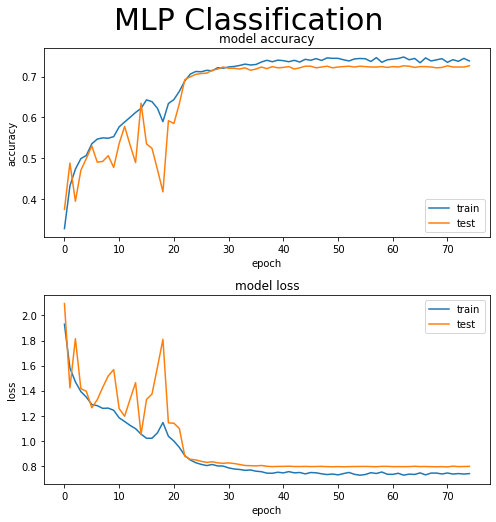

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7)) #Setting plot dimensions

#Plotting training and test accuracy of model
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plotting training and test loss of model
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('MLP Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report
labelNames = ['pop','metal','disco','blues','reggae','classical','rock','hiphop','country','jazz']
predictions = model.predict(X_test, batch_size=32) #Use model to predict on the test data

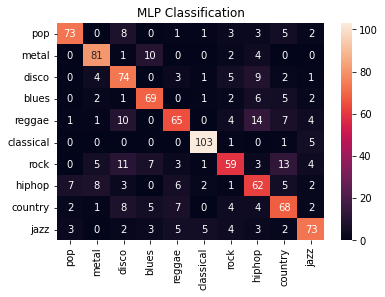

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1)) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as a heatmap
plt.title('MLP Classification');